
# AutoRegressive Integrated Moving Average (ARIMA) Model 


In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
from statsmodels.tsa import arima_process

In [22]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None
    

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

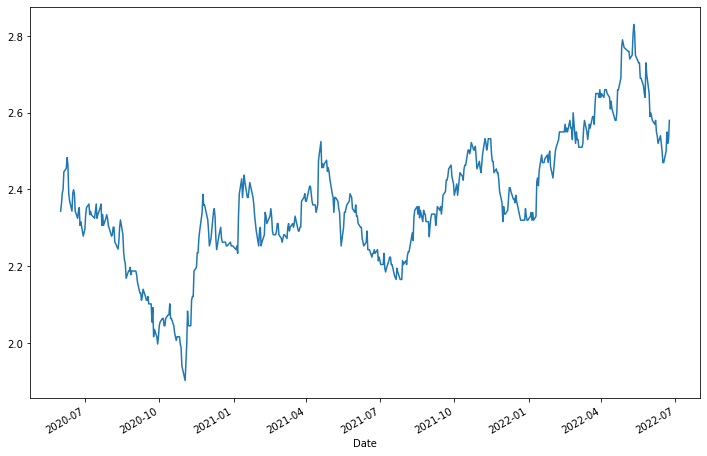

In [23]:
import yfinance as yf

data = yf.download('Z74.SI', start = '2020-06-01')
data['Adj Close'].plot(figsize=(12,8))

In [24]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
adf_result= adfuller(data['Adj Close'])
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])


ADF Statistic: -1.599961
p-value: 0.483613


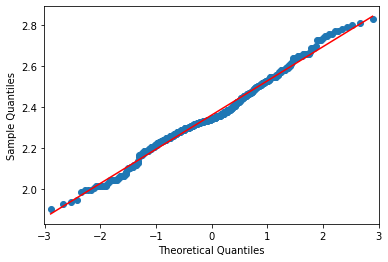

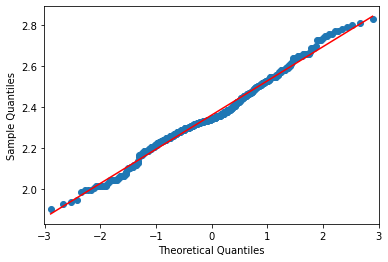

In [25]:
# QQ plot and probability plot
sm.qqplot(data['Adj Close'], line='s')

## AutoCorrelation Analysis

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


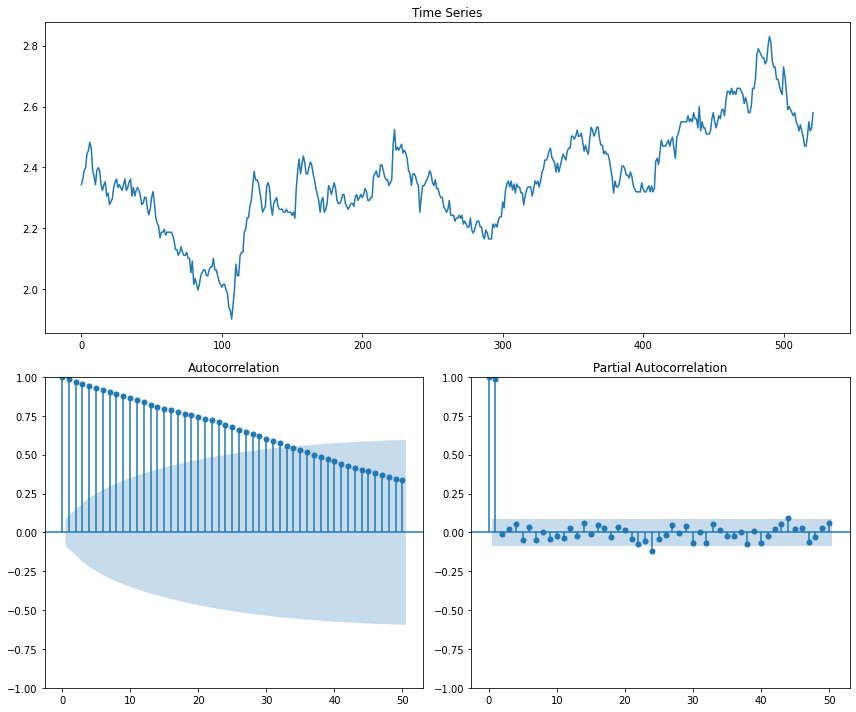

In [26]:
plotds(data['Adj Close'].values)

## ARIMA Forecasting

In [27]:
model = ARIMA(data['Adj Close'], order=(1, 1, 1))
trained_model = model.fit()
trained_model.summary()

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  522
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1148.123
Date:                Sat, 25 Jun 2022   AIC                          -2290.245
Time:                        23:06:54   BIC                          -2277.478
Sample:                             0   HQIC                         -2285.244
                                - 522                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6855     11.174      0.061      0.951     -21.214      22.585
ma.L1         -0.6841     11.191     -0.061      0.951     -22.617      21.249
sigma2         0.0007   3.35e-05     21.286      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                63.64
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.43
Prob(H) (two-sided):                  0.44   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
start_date = '2020-06-01'
end_date   = '2022-06-20'
data['forecast'] = trained_model.predict(start=start_date, end=end_date)

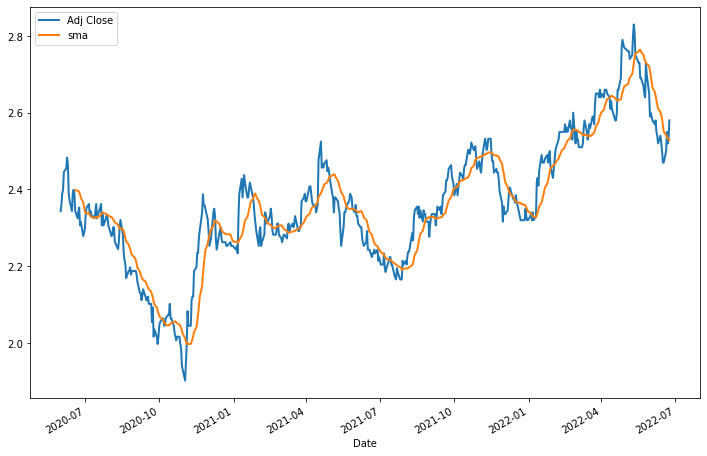

In [29]:
data['sma'] = data['Adj Close'].rolling(15).mean()
data[['Adj Close','sma']].plot(lw=2,figsize=(12,8));

In [30]:
data[['Adj Close','sma','forecast']].tail(10)

,Adj Close,sma,forecast
Date,,,
2022-06-13,2.54,2.602000,2.519936
2022-06-14,2.52,2.593333,2.539984
2022-06-15,2.50,2.584000,2.519961
2022-06-16,2.47,2.566667,2.499945
2022-06-17,2.47,2.551333,2.469921
2022-06-20,2.50,2.541333,2.469946
2022-06-21,2.55,2.538667,NaN
2022-06-22,2.52,2.533333,NaN
2022-06-23,2.53,2.529333,NaN


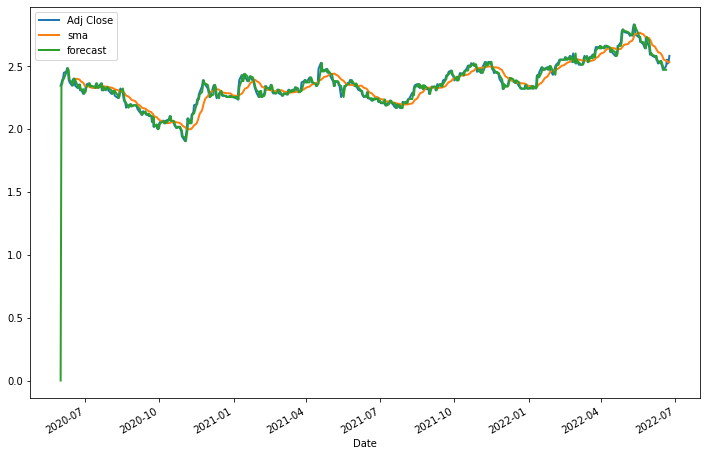

In [31]:
data[['Adj Close','sma','forecast']].plot(lw=2,figsize=(12,8));